In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from os import path
from glob import glob
import sys
sys.path.insert(0, path.abspath('./'))

from src import workdir, parse_model_parameter_file
from src.emulator_BAND import EmulatorBAND
from src.emulator import Emulator

In [2]:
model_par = "../data/modelDesign_3DMCGlauber.txt"
training_set = "../data/AuAu7.7_dNdy.pkl"

In [3]:
emu1 = EmulatorBAND(training_set, model_par, method='PCGP')
emu2 = EmulatorBAND(training_set, model_par, method='PCSK')
emu3 = Emulator(training_set, model_par, npc = 3)

[INFO][emulator_BAND] loading training data from ../data/AuAu7.7_dNdy.pkl ...
[INFO][emulator_BAND] Training dataset size: 1000
[INFO][emulator_BAND] All training data are loaded.
[INFO][emulator_BAND] loading training data from ../data/AuAu7.7_dNdy.pkl ...
[INFO][emulator_BAND] Training dataset size: 1000
[INFO][emulator_BAND] All training data are loaded.
[INFO][emulator] loading training data from ../data/AuAu7.7_dNdy.pkl ...
[INFO][emulator] Training dataset size: 1000
[INFO][emulator] All training data are loaded.


In [4]:
output_emu1 = emu1.testEmulatorErrors(number_test_points=100, number_iterations=1)

emu_pred_1 = output_emu1[0]
emu_pred_err_1 = output_emu1[1]
vali_data_1 = output_emu1[2]
vali_data_err_1 = output_emu1[3]

[INFO][emulator_BAND] Validation GP emulators iter = 0 ...
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 900 training points ...
[array([[106.136   ,  87.3552  ,  66.852   , ...,  21.155   ,  13.4459  ,
          7.84425 ],
       [ 31.2434  ,  23.0782  ,  15.1707  , ...,   6.12093 ,   2.27271 ,
          0.775184],
       [ 24.269   ,  18.3753  ,  12.8114  , ...,   6.77011 ,   3.03144 ,
          1.01374 ],
       ...,
       [ 23.828   ,  17.719   ,  12.1411  , ...,   6.9793  ,   3.87739 ,
          1.99945 ],
       [ 11.2567  ,   8.14981 ,   5.31093 , ...,   1.72552 ,   0.784173,
          0.307406],
       [101.828   ,  82.3314  ,  62.1396  , ...,  19.0582  ,  11.6006  ,
          6.06631 ]])]


In [5]:
output_emu2 = emu2.testEmulatorErrors(number_test_points=100, number_iterations=1)

emu_pred_2 = output_emu2[0]
emu_pred_err_2 = output_emu2[1]
vali_data_2 = output_emu2[2]
vali_data_err_2 = output_emu2[3]

[INFO][emulator_BAND] Validation GP emulators iter = 0 ...
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 900 training points ...
[array([[106.136   ,  87.3552  ,  66.852   , ...,  21.155   ,  13.4459  ,
          7.84425 ],
       [ 31.2434  ,  23.0782  ,  15.1707  , ...,   6.12093 ,   2.27271 ,
          0.775184],
       [ 24.269   ,  18.3753  ,  12.8114  , ...,   6.77011 ,   3.03144 ,
          1.01374 ],
       ...,
       [ 23.828   ,  17.719   ,  12.1411  , ...,   6.9793  ,   3.87739 ,
          1.99945 ],
       [ 11.2567  ,   8.14981 ,   5.31093 , ...,   1.72552 ,   0.784173,
          0.307406],
       [101.828   ,  82.3314  ,  62.1396  , ...,  19.0582  ,  11.6006  ,
          6.06631 ]])]


In [6]:
output_emu3 = emu3.testEmulatorErrors(nTestPoints=100, nIters=1)

emu_pred_3 = output_emu3[0]
emu_pred_err_3 = output_emu3[1]
vali_data_3 = output_emu3[2]
vali_data_err_3 = output_emu3[3]

[INFO][emulator] Validating GP emulators iter = 0 ...
[INFO][emulator] Perforing PCA ...
[INFO][emulator] 3 PCs explain 0.99324 of variance
[INFO][emulator] Train GP emulators with 900 training points ...
[INFO][emulator] GP 0: 0.91419 of variance, LML = -220.15, Score = 0.96, kernel: 2.79**2 * RBF(length_scale=[1.75e+03, 15.3, 1.34, 29.1, 300, 18.8, 1.81, 100, 0.896, 1.36, 100, 3.13, 29.9, 29.9, 29.9, 0.455, 20, 20, 0.32, 14, 0.293, 2.84]) + WhiteKernel(noise_level=0.01)
[INFO][emulator] GP 1: 0.05688 of variance, LML = -476.97, Score = 0.94, kernel: 1.69**2 * RBF(length_scale=[2.4e+03, 5.97, 1.03, 18.4, 300, 70, 1.85, 2.21, 0.401, 0.772, 34.4, 1.3, 29.9, 6.77, 4.37, 0.349, 20, 20, 0.24, 3.83, 0.208, 1.29]) + WhiteKernel(noise_level=0.01)
[INFO][emulator] GP 2: 0.02217 of variance, LML = -601.1, Score = 0.93, kernel: 1.45**2 * RBF(length_scale=[75.1, 3.95, 0.956, 10.2, 300, 6.64, 2.48, 2.05, 0.271, 0.577, 13, 1.03, 29.9, 5.86, 1.44, 0.488, 20, 20, 0.419, 14, 0.915, 0.673]) + WhiteKern

In [7]:
def plot_emulator_vs_truth(vali_data,vali_data_err,emu_pred,emu_pred_err):
    nValidationPoints, nObs = vali_data_3.shape

    for obsIdx in range(nObs):
        fig = plt.figure()
        ax = plt.axes([0.12, 0.12, 0.83, 0.83])
        plt.errorbar(vali_data[:, obsIdx], emu_pred[:, obsIdx],
                    yerr=np.sqrt(emu_pred_err[:, obsIdx,obsIdx]),
                    xerr=vali_data_err[:, obsIdx],
                    marker="o", linestyle="")
        plt.plot([-200, 200], [-200, 200], '--k')
        plt.xlim([vali_data[:, obsIdx].min() - 1,
                vali_data[:, obsIdx].max() + 1])
        plt.ylim([emu_pred[:, obsIdx].min() - 1,
                emu_pred[:, obsIdx].max() + 1])
        ax.set_aspect('equal')
        ax.text(0.05, 0.95, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='top')
        plt.xlabel("truth", fontsize = 15)
        plt.ylabel("emulator results", fontsize = 15)
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 

    plt.show()


def plot_emulator_vs_truth_relative(vali_data,vali_data_err,emu_pred,emu_pred_err):
    nValidationPoints, nObs = vali_data.shape

    for obsIdx in range(nObs):
        fig = plt.figure()
        ax = plt.axes([0.12, 0.12, 0.83, 0.83])
        plt.plot(range(len(vali_data)),
                (emu_pred[:, obsIdx] - vali_data[:, obsIdx])/np.sqrt(vali_data_err[:, obsIdx]**2.+ emu_pred_err[:, obsIdx, obsIdx]),
                marker="o", linestyle="")
        plt.fill_between([-nValidationPoints, nValidationPoints], [2, 2], [-2, -2], color='g', alpha=0.2)
        plt.xlim([-1,len(vali_data)+1])
        plt.ylim([-4, 4])
        ax.text(0.05, 0.95, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='top')
        plt.xlabel("test point")
        plt.ylabel("relative diff. [$\sigma$]")

def plot_histogram_emulator_vs_truth_relative(vali_data_list,emu_pred_list,emu_pred_err_list,dataset_labels=None):
    if not isinstance(vali_data_list, list):
        vali_data_list = [vali_data_list]
    if not isinstance(emu_pred_list, list):
        emu_pred_list = [emu_pred_list]
    if not isinstance(emu_pred_err_list, list):
        emu_pred_err_list = [emu_pred_err_list]
    if not isinstance(dataset_labels, list):
        dataset_labels = [dataset_labels]
    
    nObs = vali_data_list[0].shape[1]  # Assuming all datasets have the same number of observables

    for obsIdx in range(nObs):
        fig, ax = plt.subplots()
        ax.set_xlabel("A = (GP-truth)/GPerr", fontsize = 15)
        ax.set_ylabel("p(A)", fontsize = 15)
        
        for vali_data, emu_pred, emu_pred_err, label in zip(vali_data_list, emu_pred_list, emu_pred_err_list, dataset_labels):

            if (label == 'Scikit GP'):
                ax.hist((emu_pred[:, obsIdx] - vali_data[:, obsIdx]) / np.sqrt(emu_pred_err[:, obsIdx, obsIdx]), 
                    bins=30, density=True, alpha=0.4,edgecolor = 'black', label=label)
            else:
                ax.hist((emu_pred[:, obsIdx] - vali_data[:, obsIdx]) / np.sqrt(emu_pred_err[:, obsIdx, obsIdx]), 
                    bins=30, density=True, alpha=0.8,edgecolor = 'black', label=label)
            
                
        x = np.linspace(-6, 6, 300)
        y = (1 / (np.sqrt(2*np.pi))) * np.exp(-0.5 * x**2)        
        plt.plot(x, y, color = 'black', zorder = 2, linewidth = 2, label = 'Standard Distribution')

        ax.text(0.05, 0.80, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='bottom')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        ax.legend()
        plt.figure(figsize=(8, 6))
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.show()

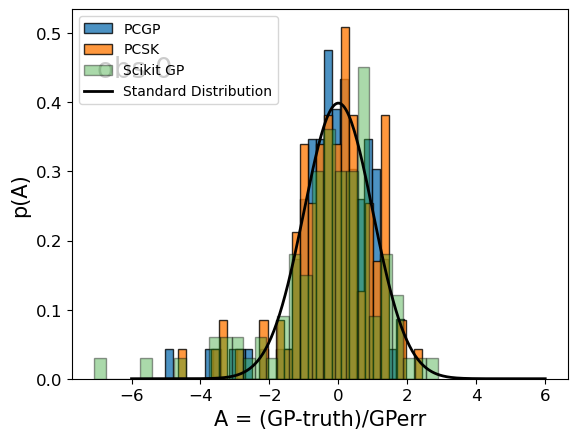

<Figure size 800x600 with 0 Axes>

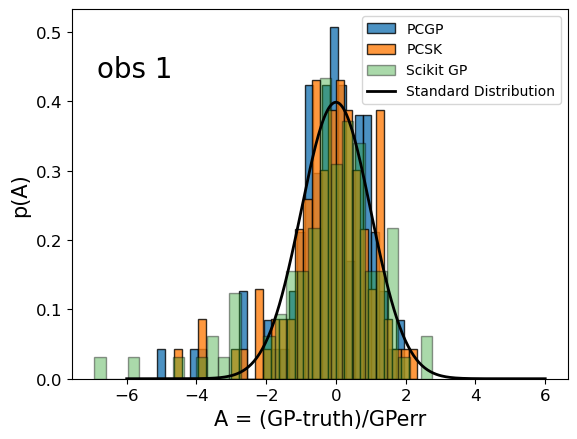

<Figure size 800x600 with 0 Axes>

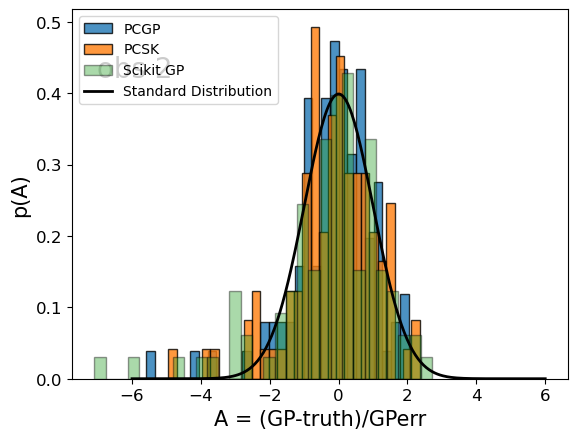

<Figure size 800x600 with 0 Axes>

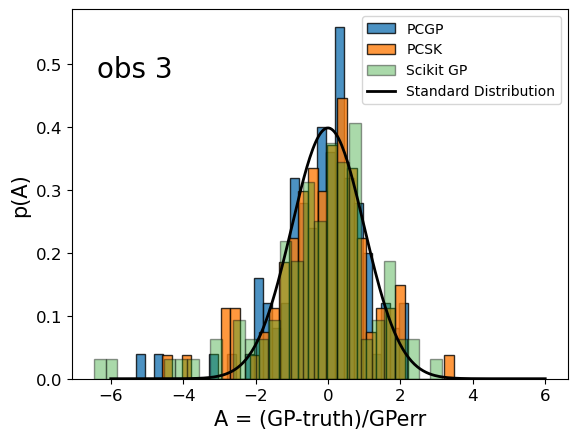

<Figure size 800x600 with 0 Axes>

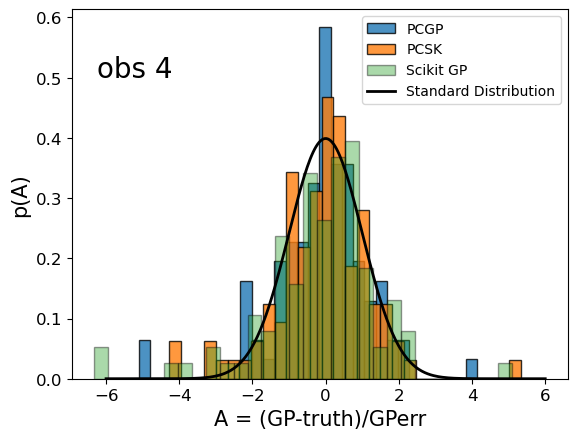

<Figure size 800x600 with 0 Axes>

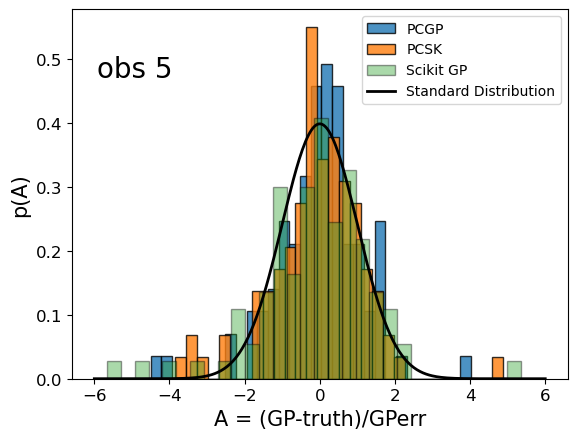

<Figure size 800x600 with 0 Axes>

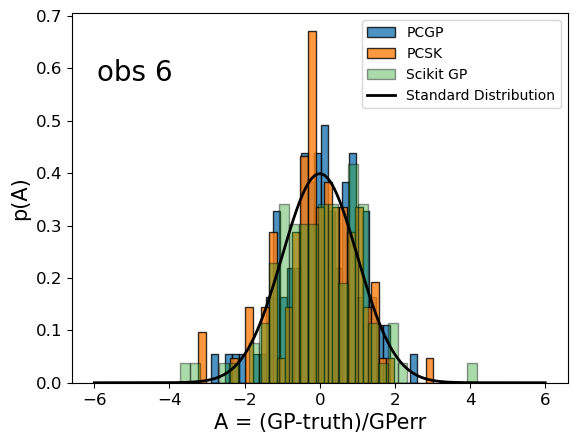

<Figure size 800x600 with 0 Axes>

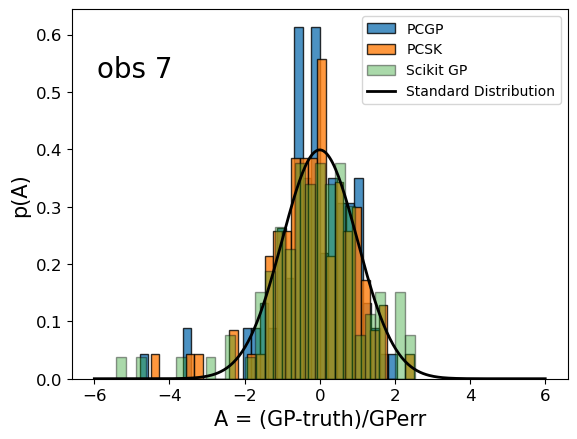

<Figure size 800x600 with 0 Axes>

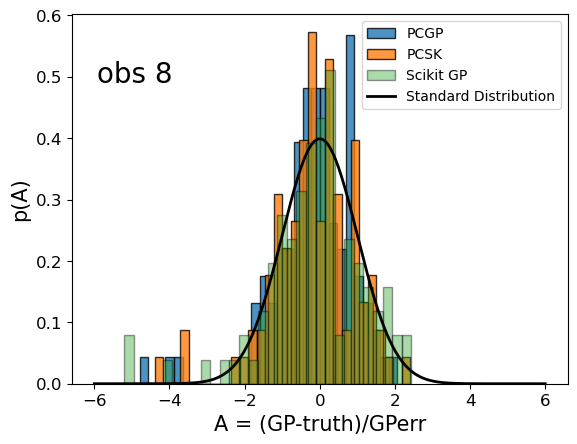

<Figure size 800x600 with 0 Axes>

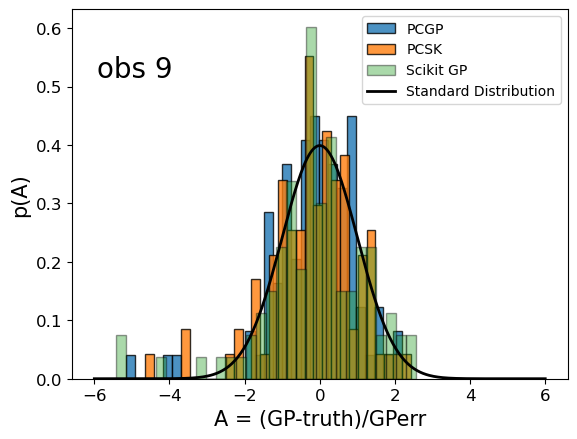

<Figure size 800x600 with 0 Axes>

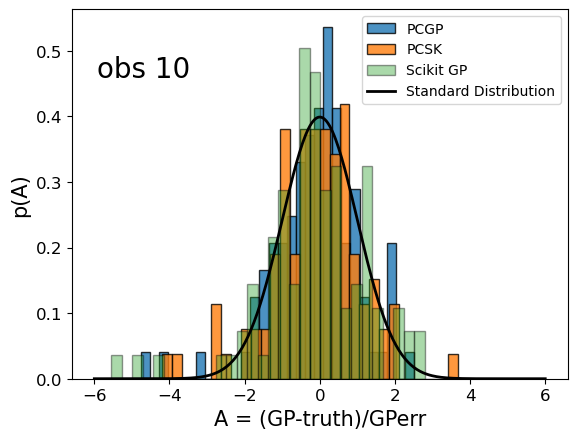

<Figure size 800x600 with 0 Axes>

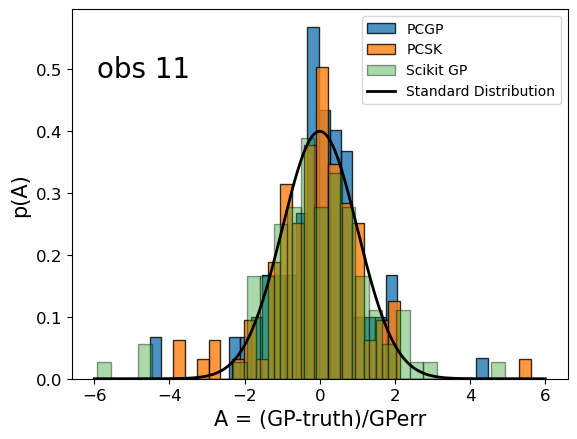

<Figure size 800x600 with 0 Axes>

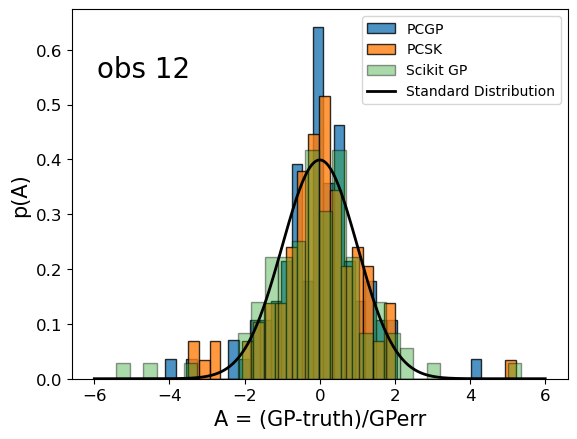

<Figure size 800x600 with 0 Axes>

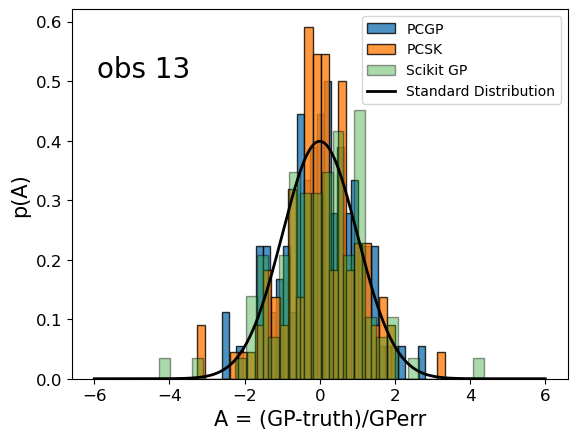

<Figure size 800x600 with 0 Axes>

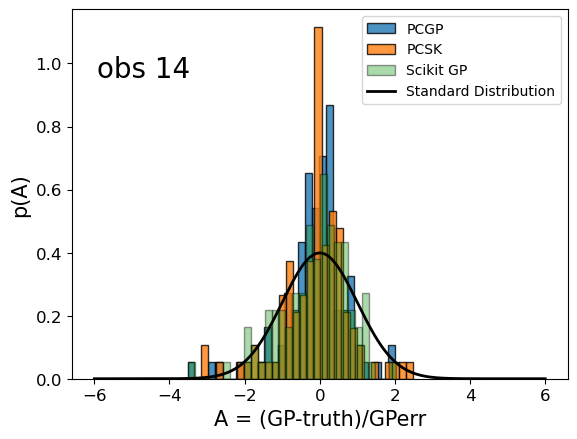

<Figure size 800x600 with 0 Axes>

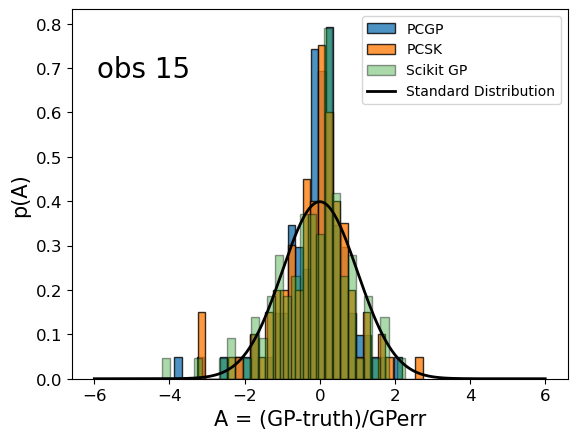

<Figure size 800x600 with 0 Axes>

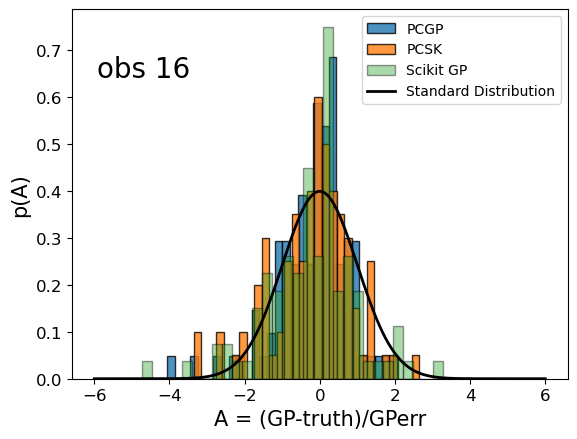

<Figure size 800x600 with 0 Axes>

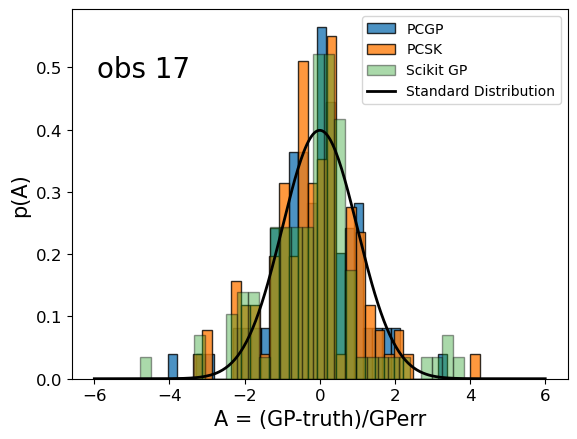

<Figure size 800x600 with 0 Axes>

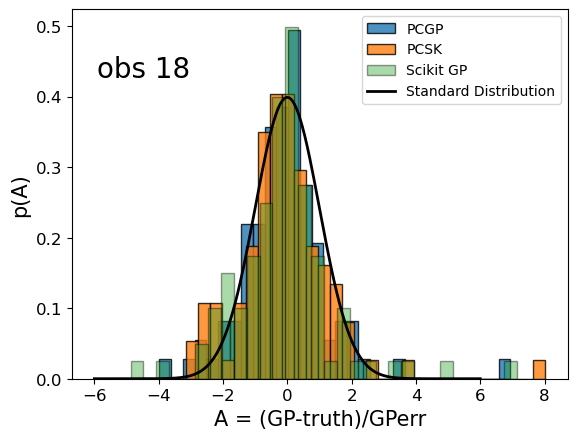

<Figure size 800x600 with 0 Axes>

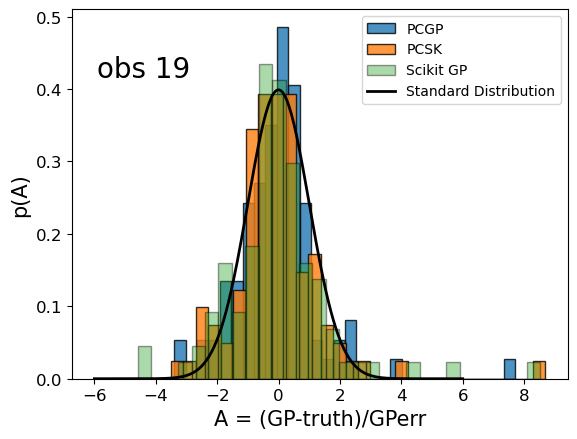

<Figure size 800x600 with 0 Axes>

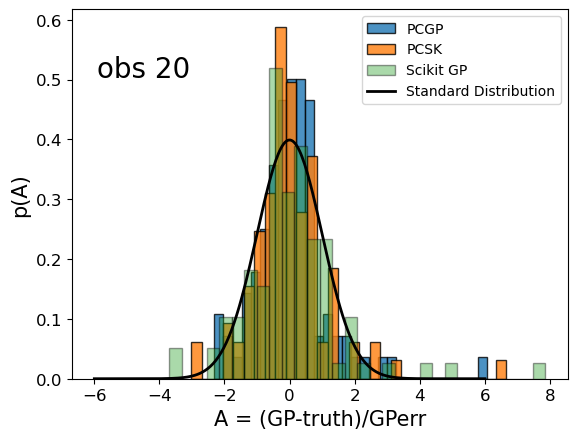

<Figure size 800x600 with 0 Axes>

In [8]:
vali = [vali_data_1,vali_data_2, vali_data_3]
emu = [emu_pred_1, emu_pred_2, emu_pred_3]
emu_err = [emu_pred_err_1,emu_pred_err_2,emu_pred_err_3]
lab = ['PCGP', 'PCSK', 'Scikit GP']

plot_histogram_emulator_vs_truth_relative(vali,emu,emu_err,lab)

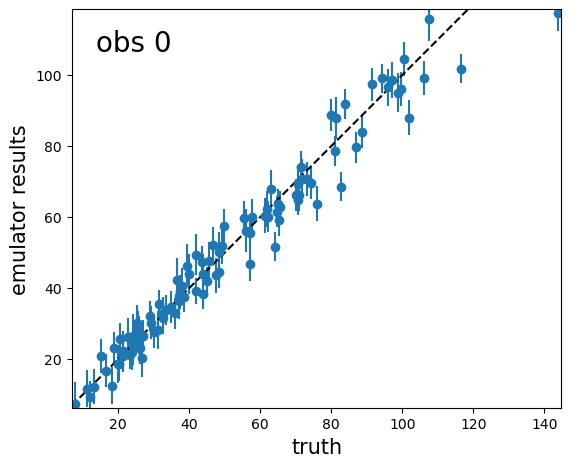

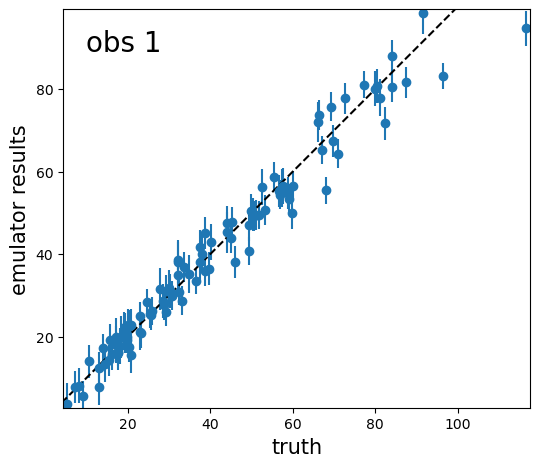

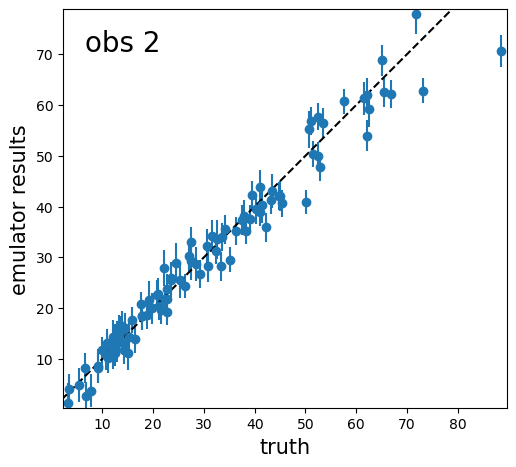

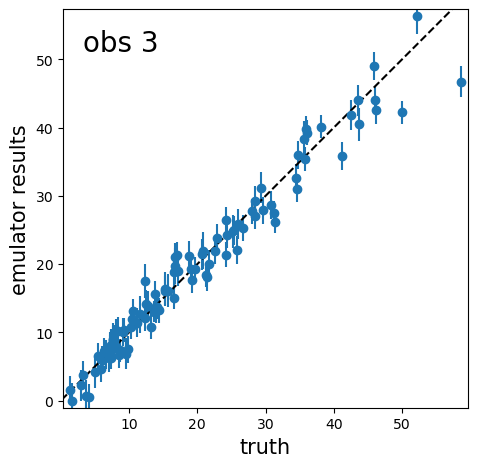

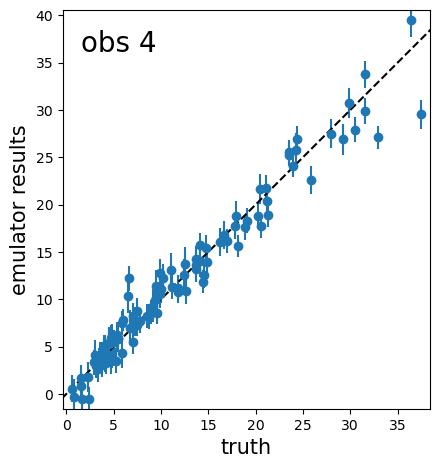

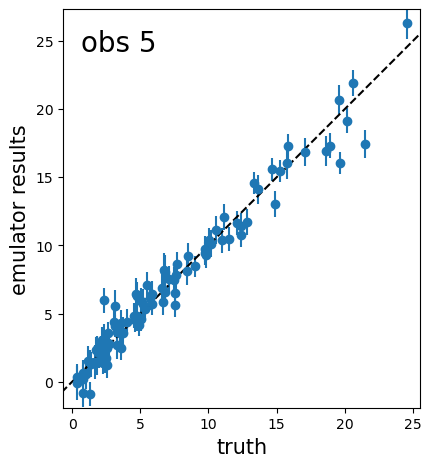

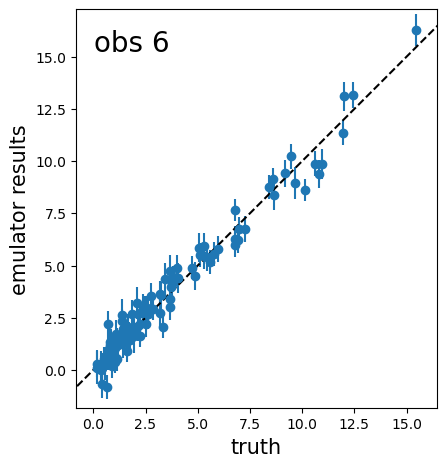

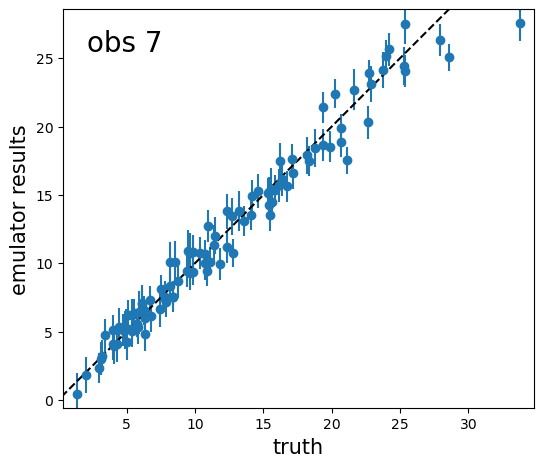

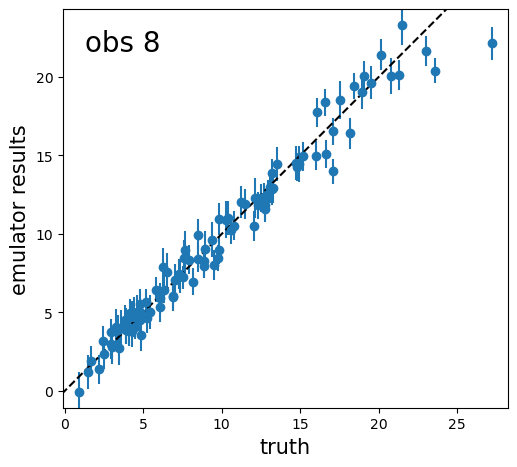

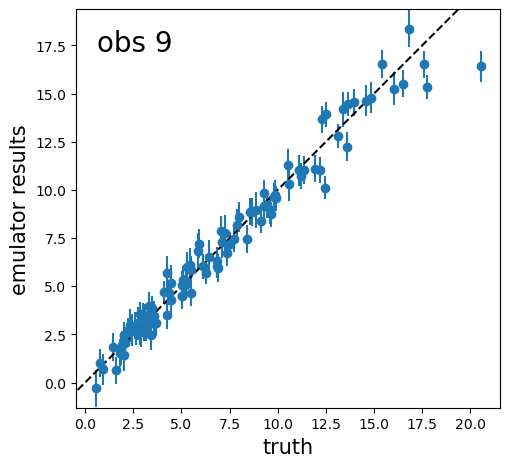

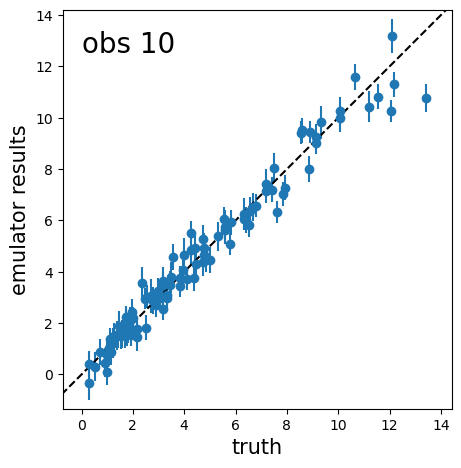

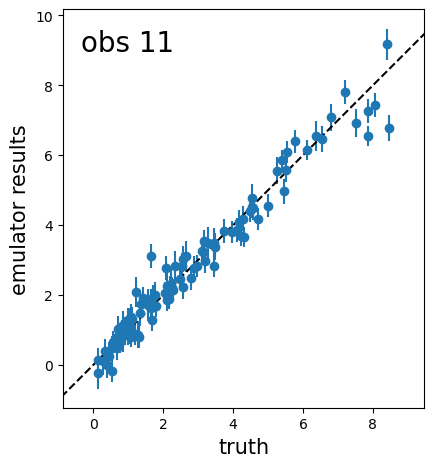

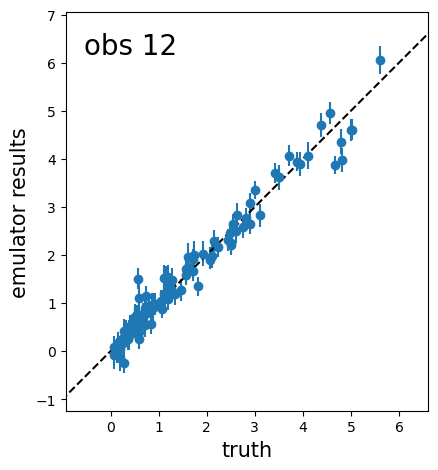

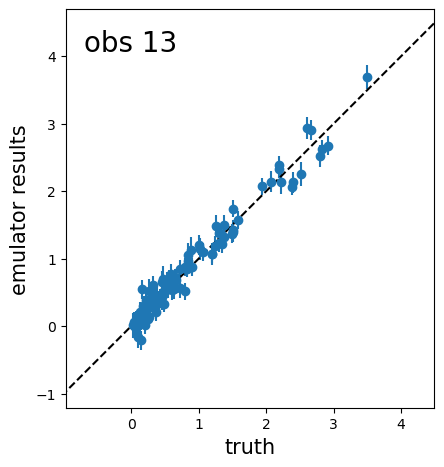

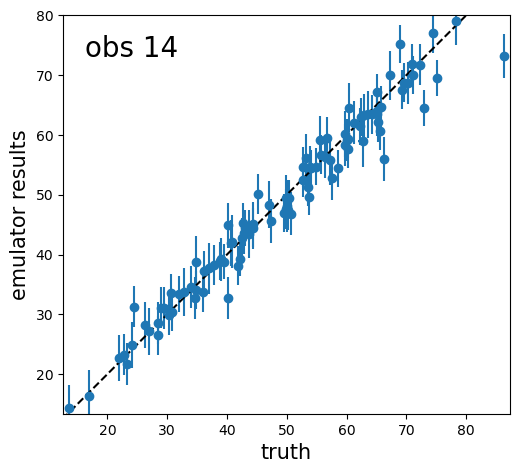

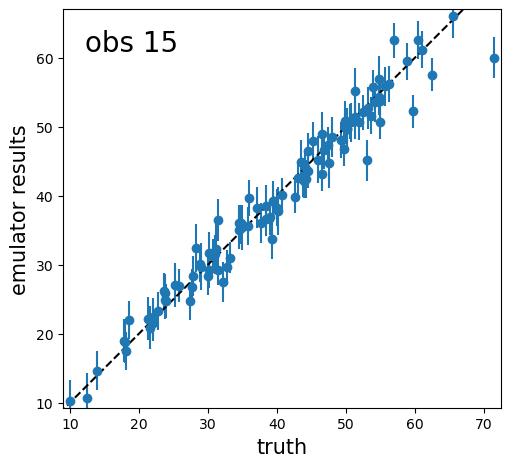

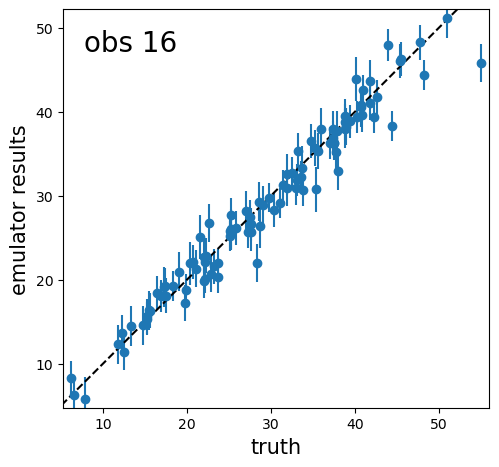

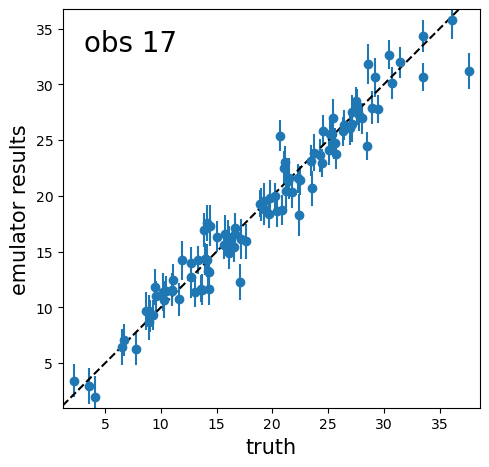

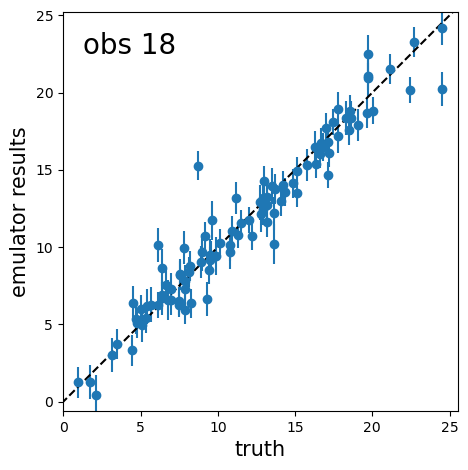

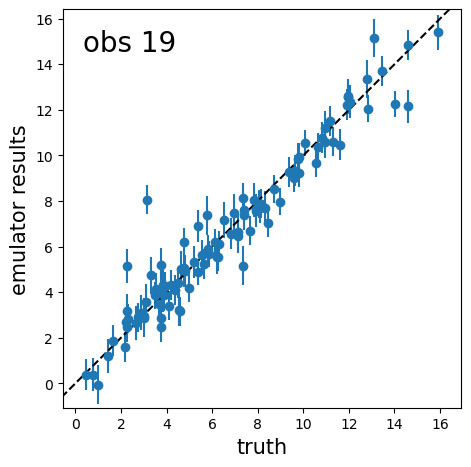

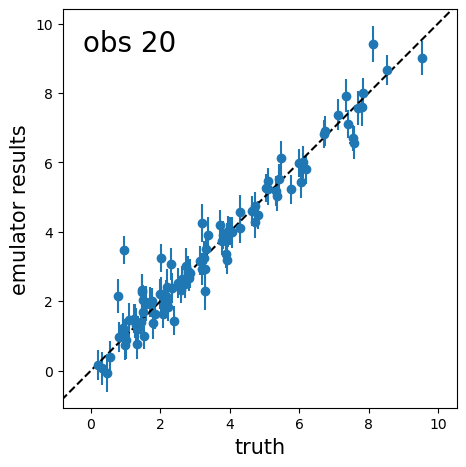

In [9]:
plot_emulator_vs_truth(vali_data_1,vali_data_err_1,emu_pred_1,emu_pred_err_1)